<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/MachineLearningBook/Wide%26Deep_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [0]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [3]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(5, activation='relu')(input)
hidden2 = keras.layers.Dense(3, activation='relu')(hidden1)
#concat = keras.layers.Concatenate()([input,hidden2])
output = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs=[input], outputs=[output])

Instructions for updating:
Colocations handled automatically by placer.


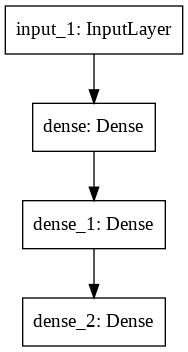

In [4]:
keras.utils.plot_model(model)
from IPython.display import Image
Image('model.png')

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 5)                 45        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='mean_squared_error',
             optimizer='sgd')

his = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 11610 samples, validate on 3870 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
11610/11610 [==============================] - 1s 114us/sample - loss: 0.6966 - val_loss: 0.5040
Epoch 2/30
11610/11610 [==============================] - 1s 105us/sample - loss: 0.4761 - val_loss: 1.9430
Epoch 3/30
11610/11610 [==============================] - 1s 101us/sample - loss: 0.5511 - val_loss: 0.4920
Epoch 4/30
11610/11610 [==============================] - 1s 102us/sample - loss: 0.4361 - val_loss: 0.4361
Epoch 5/30
11610/11610 [==============================] - 1s 102us/sample - loss: 0.4212 - val_loss: 0.4393
Epoch 6/30
11610/11610 [==============================] - 1s 101us/sample - loss: 0.4128 - val_loss: 0.4990
Epoch 7/30
11610/11610 [==============================] - 1s 101us/sample - loss: 0.4083 - val_loss: 0.4320
Epoch 8/30
11610/11610 [==============================] - 1s 102us/sample - loss: 0.4040 - val_loss

In [7]:
his.params

{'batch_size': 10,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'val_loss'],
 'samples': 11610,
 'steps': None,
 'verbose': 0}

In [8]:
his.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

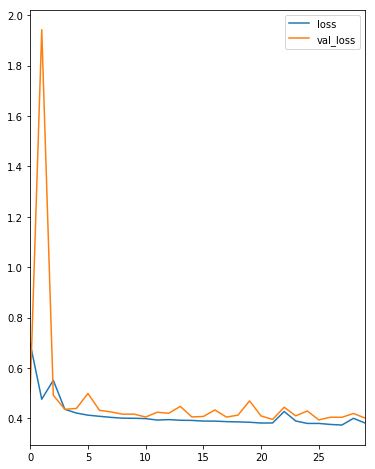

In [9]:
import pandas as pd
pd.DataFrame(his.history).plot(figsize=(6,8))